# Sentiment Clustering

## Setup

### Imports

In [1]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]

### Data

In [2]:
# jsonData = json.load(open("C:\\Users\\lukas\\Documents\\Waultar\\performance\\dataPoints.json", encoding="utf8"))
jsonData = json.load(open("C:\\Users\\lukas\\Documents\\waultar\\performance\\dataPoints.json", encoding="utf8"))

x_list = []
y_list = []
count = 0
sentimentTextCount = 0
sentimentTextList = []

# m1 = MinHash(num_perm=128)

for point in jsonData:
    count = count + 1
    # if "sentimentText" in point.keys() and len(point["sentimentText"]) > 0 and point["sentimentText"] != None:
    if point["sentimentScore"] != None:
        print(point["sentimentScore"])
        sentimentTextCount = sentimentTextCount + 1
        sentimentTextList.append(point["sentimentText"])
        x_list.append(count)
        y_list.append(point["sentimentScore"])

0.3906795382499695
0.4404650032520294
0.447296679019928
0.447296679019928
0.44527846574783325
0.4404650032520294
0.43418070673942566
0.35438966751098633
0.43418070673942566
0.44782498478889465
0.44099169969558716
0.41999760270118713
0.45467808842658997
0.44099169969558716
0.45467808842658997
0.42063531279563904
0.4084625840187073
0.36706608533859253
0.426026850938797
0.4386291205883026
0.3427800238132477
0.44099169969558716
0.4103798270225525
0.6616923213005066
0.3950154185295105
0.42063531279563904
0.43418070673942566
0.41390591859817505
0.4341850280761719
0.4054329991340637
0.41709277033805847
0.45467808842658997
0.44896066188812256
0.45467808842658997
0.36706608533859253
0.3858547806739807
0.4539409875869751
0.4304896295070648
0.37033700942993164
0.381867378950119
0.21053530275821686
0.45467808842658997
0.45467808842658997
0.4718654155731201
0.42063531279563904
0.4539409875869751
0.41318464279174805
0.36443179845809937
0.26564091444015503
0.5280482769012451
0.39994391798973083
0.275

## Cleaning of data, emojis and hashtags

In [7]:
#!/usr/bin/env python
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for text in sentimentTextList:
    print(deEmojify(text))

Pas pÃ¥ - nu er jeg ogsÃ¥ pÃ¥ facebook :O)
fedt med lidt exstra ferie
Skal til barnedov bliver lidt sjovt ;-)
WUHU!!!!!! skal til graduering til grÃ¸nt;-))))))


## Overview of sentiment data

In [3]:
print(f"##### Start of DataPoint Analysis ####")
print(f"Total amount of data points: {count}")
print(f"{sentimentTextCount} sentiment text found")
print(f"##### End of DataPoint Analysis ####")

##### Start of DataPoint Analysis ####
Total amount of data points: 1411
314 sentiment text found
##### End of DataPoint Analysis ####


## Clustering of data

[[1.29050000e+03 4.17270616e-01]
 [1.28800000e+03 4.08317119e-01]
 [1.28900000e+03 4.27394360e-01]]


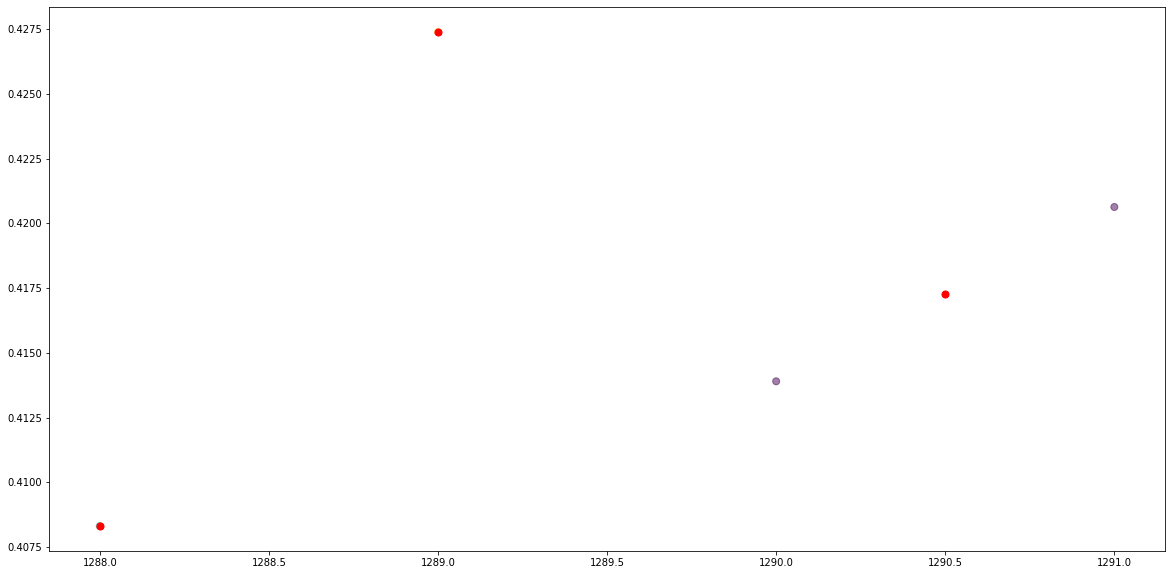

In [5]:
rawData = {'x': x_list, 'y': y_list}
df = DataFrame(rawData, columns=['x','y'])

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [35]:
#test
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 3),
    min_df=0,
    stop_words='english')
X_tfidf = tfidf.fit_transform(df['x'])
X_tfidf

<677x6185 sparse matrix of type '<class 'numpy.float64'>'
	with 15501 stored elements in Compressed Sparse Row format>